In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

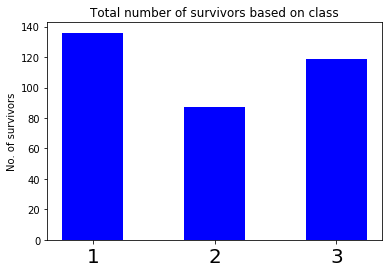

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [95]:
# import dataset
df = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# analyse data
# missing data
df['Pclass'].isnull().value_counts()
df['Survived'].isnull().value_counts()

survivors = df.groupby('Pclass')['Survived'].agg(sum) # passengers survived in each class

# total passengers in each class
total_passengers = df.groupby('Pclass')['PassengerId'].count()
survivor_percentage = survivors / total_passengers

# plotting
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivors.index.values.tolist(), survivors, color='blue', width=0.5)
ax.set_ylabel('No. of survivors')
ax.set_title('Total number of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

# train data
y = df.iloc[:, 1].copy()
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()
X[X['Sex'] == 'male'] = 1
X[X['Sex'] == 'female'] = 0

# test data
y_test = test.iloc[:, 1].copy()
X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].copy()
X_test[X_test['Sex'] == 'male'] = 1
X_test[X_test['Sex'] == 'female'] = 0

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.bar(survivor_percentage.index.values.tolist(), survivor_percentage, color='blue', width=0.5)
ax.set_ylabel('Survivor Percentage')
ax.set_title('Percentage of survivors based on class')
xTickMarks = survivors.index.values.tolist()
ax.set_xticks(survivors.index.values.tolist())
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.show()

In [ ]:
# male and female survivors based on class
male_survivors = df[df['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
total_male_passengers = df[df['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survivors / total_male_passengers
female_survivors = df[df['Sex'] == 'female'].groupby('Pclass')['Survived'].agg(sum)
total_female_passengers = df[df['Sex'] == 'female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survivors / total_female_passengers

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivors.count())
bar_width = 0.35
rect = ax.bar(index, male_survivors, bar_width, color='blue', label='men')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width, color='yellow', label='women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index+bar_width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# percentage male and female survivors based on class

fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(male_survivor_percentage.count())
bar_width = 0.35
rect = ax.bar(index, male_survivor_percentage, bar_width, color='blue', label='men')
rect2 = ax.bar(index + bar_width, female_survivor_percentage, bar_width, color='yellow', label='women')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Male and Female survivors based on class')
xTickMarks = male_survivors.index.values.tolist()
ax.set_xticks(index+bar_width/2)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=20)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# total number of nonsurvivors with family based on class


In [ ]:
# percentage of nonsurvivors with family based on class


In [92]:
# implement random forest regression

from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 500)
regressor.fit(X, y)
pred = regressor.predict(X_test)
type(y_test)
type(pred)
a = (pred == y_test).tolist()
count = 0
total = 0
for i in a:
    total += 1
    if(i):
        count += 1
(count/total) * 100
X
#dir(np.ndarray)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,1,1.0,1,1,1
1,0,0,0.0,0,0,0
2,0,0,0.0,0,0,0
3,0,0,0.0,0,0,0
4,1,1,1.0,1,1,1
5,1,1,1.0,1,1,1
6,1,1,1.0,1,1,1
7,1,1,1.0,1,1,1
8,0,0,0.0,0,0,0
9,0,0,0.0,0,0,0
